In [1]:
cd /content/drive/MyDrive/Data project (VITA)/Data

/content/drive/MyDrive/Data project (VITA)/Data


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import math

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Data project (VITA)/Data/labeled_data_apple.csv')

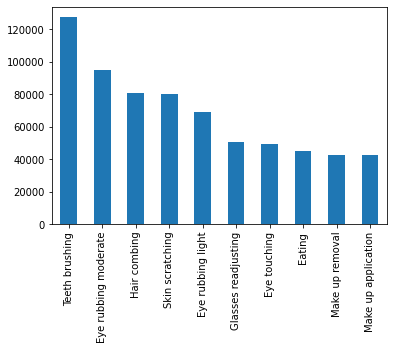

In [5]:
# Labels distribution
data[data['label'] !='no_label'].label.value_counts().plot(kind="bar")

In [6]:
# Create sequences as in the training file
sequences = []
labels = []
data_cleaned = data.dropna()
columns = data.columns
for series_id, group in data_cleaned[columns].groupby("label"):
  label = data_cleaned[data_cleaned['label'] == series_id].iloc[0].label
  if label=='no_label':
    break
  for _, action in group[columns].groupby(group[columns].index.to_series().diff().ne(1).cumsum()):
    sequence_features = action[columns]
    sequences.append((sequence_features, label))
    labels.append(label)

In [8]:
# Split train and test using the same random seed as in training
train_sequences, test_sequences = train_test_split(sequences, test_size=0.15, random_state=42)

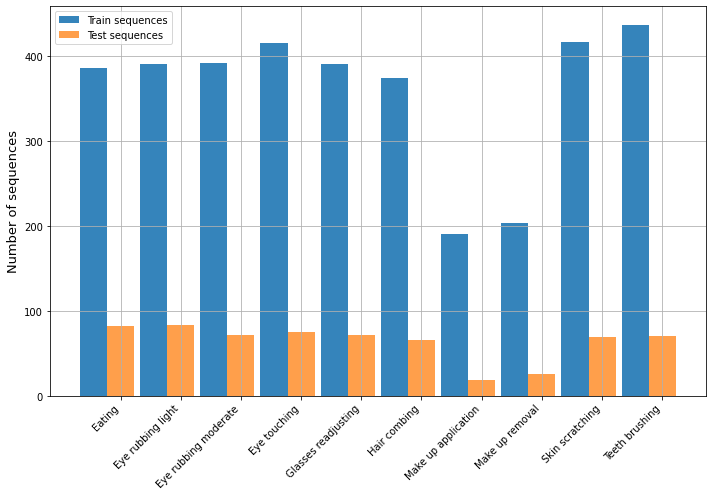

In [10]:
# Sequences distribution
labels_train = []
labels_test = []
for s in test_sequences:
  labels_test.append(s[1])

for s in train_sequences:
  labels_train.append(s[1])

labels_train.sort()
labels_test.sort()

df_train = pd.DataFrame({'labels': labels_train})
df_test = pd.DataFrame({'labels': labels_test})

plt.figure(figsize=(10,7))
index = np.arange(10)
bar_width = 0.45
r1 = plt.bar(index, df_train.groupby(['labels'])['labels'].count().values,
       bar_width, alpha=0.9, label = 'Train sequences')
r2 = plt.bar(index+ bar_width, df_test.groupby(['labels'])['labels'].count().values,
       bar_width, alpha=0.75, label = 'Test sequences')
plt.xticks(index + bar_width, df_test.groupby(['labels'])['labels'].count().index,
      rotation = 45, horizontalalignment = 'right')
plt.ylabel('Number of sequences', fontsize=13)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


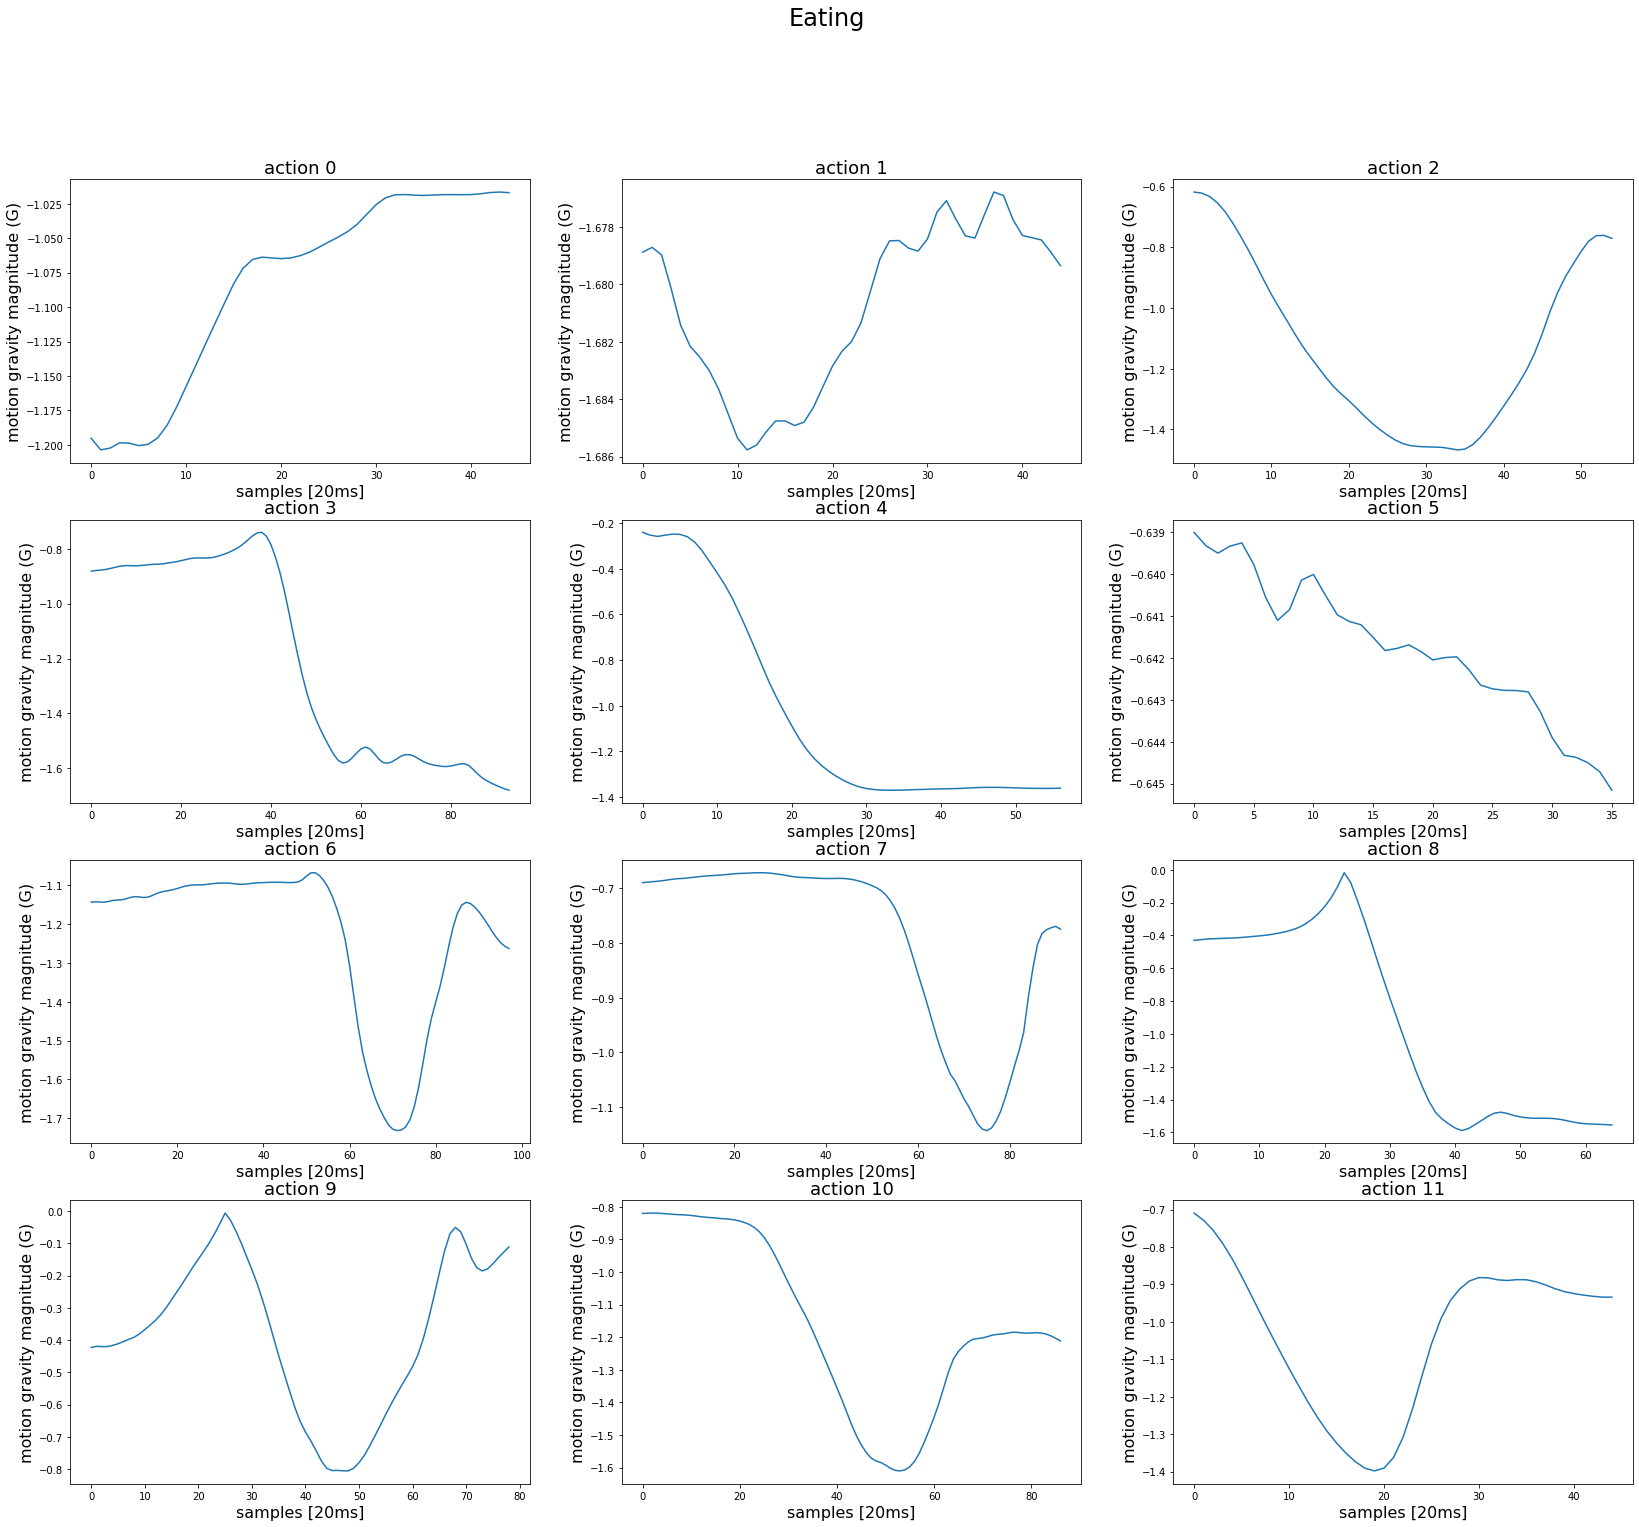

In [12]:
seq = []
labels = []
for s in test_sequences:
  seq.append(s[0])
  labels.append(s[1])

label = 'Eating'
actions_shifted = np.array(seq)[np.array(labels)==label]
actions = [seq[i] for i in np.where(np.array(labels)==label)[0]][:12] # Take 12 first only
n_actions = len(actions)
ncols, nrows = 3, math.ceil(n_actions/3)
fig, axes = plt.subplots(ncols=ncols, nrows=nrows,figsize=(28,6*nrows))
fig.suptitle(label, fontsize=24)

for i in range(n_actions):
  action = actions[i]
  action_shifted = actions_shifted[i]
  # Append plot to axis
  signal = -1*np.sqrt(action['motionGravityY(G)'].values**2 +action['motionGravityY(G)'].values**2 + action['motionGravityY(G)'].values**2)
  axes[i//3,i%3].plot( signal, label='action')
  #axes[i//3,i%3].plot(action_shifted['epoc (ms)'], action_shifted['z-axis (g)'], alpha=0.5, label='action shifted')
  axes[i//3,i%3].set_title('action {}'.format(i), fontsize=18)
  axes[i//3,i%3].set_xlabel('samples [20ms]', fontsize=16)
  axes[i//3,i%3].set_ylabel('motion gravity magnitude (G)', fontsize=16)
  #axes[i//3,i%3].legend(fontsize=14)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


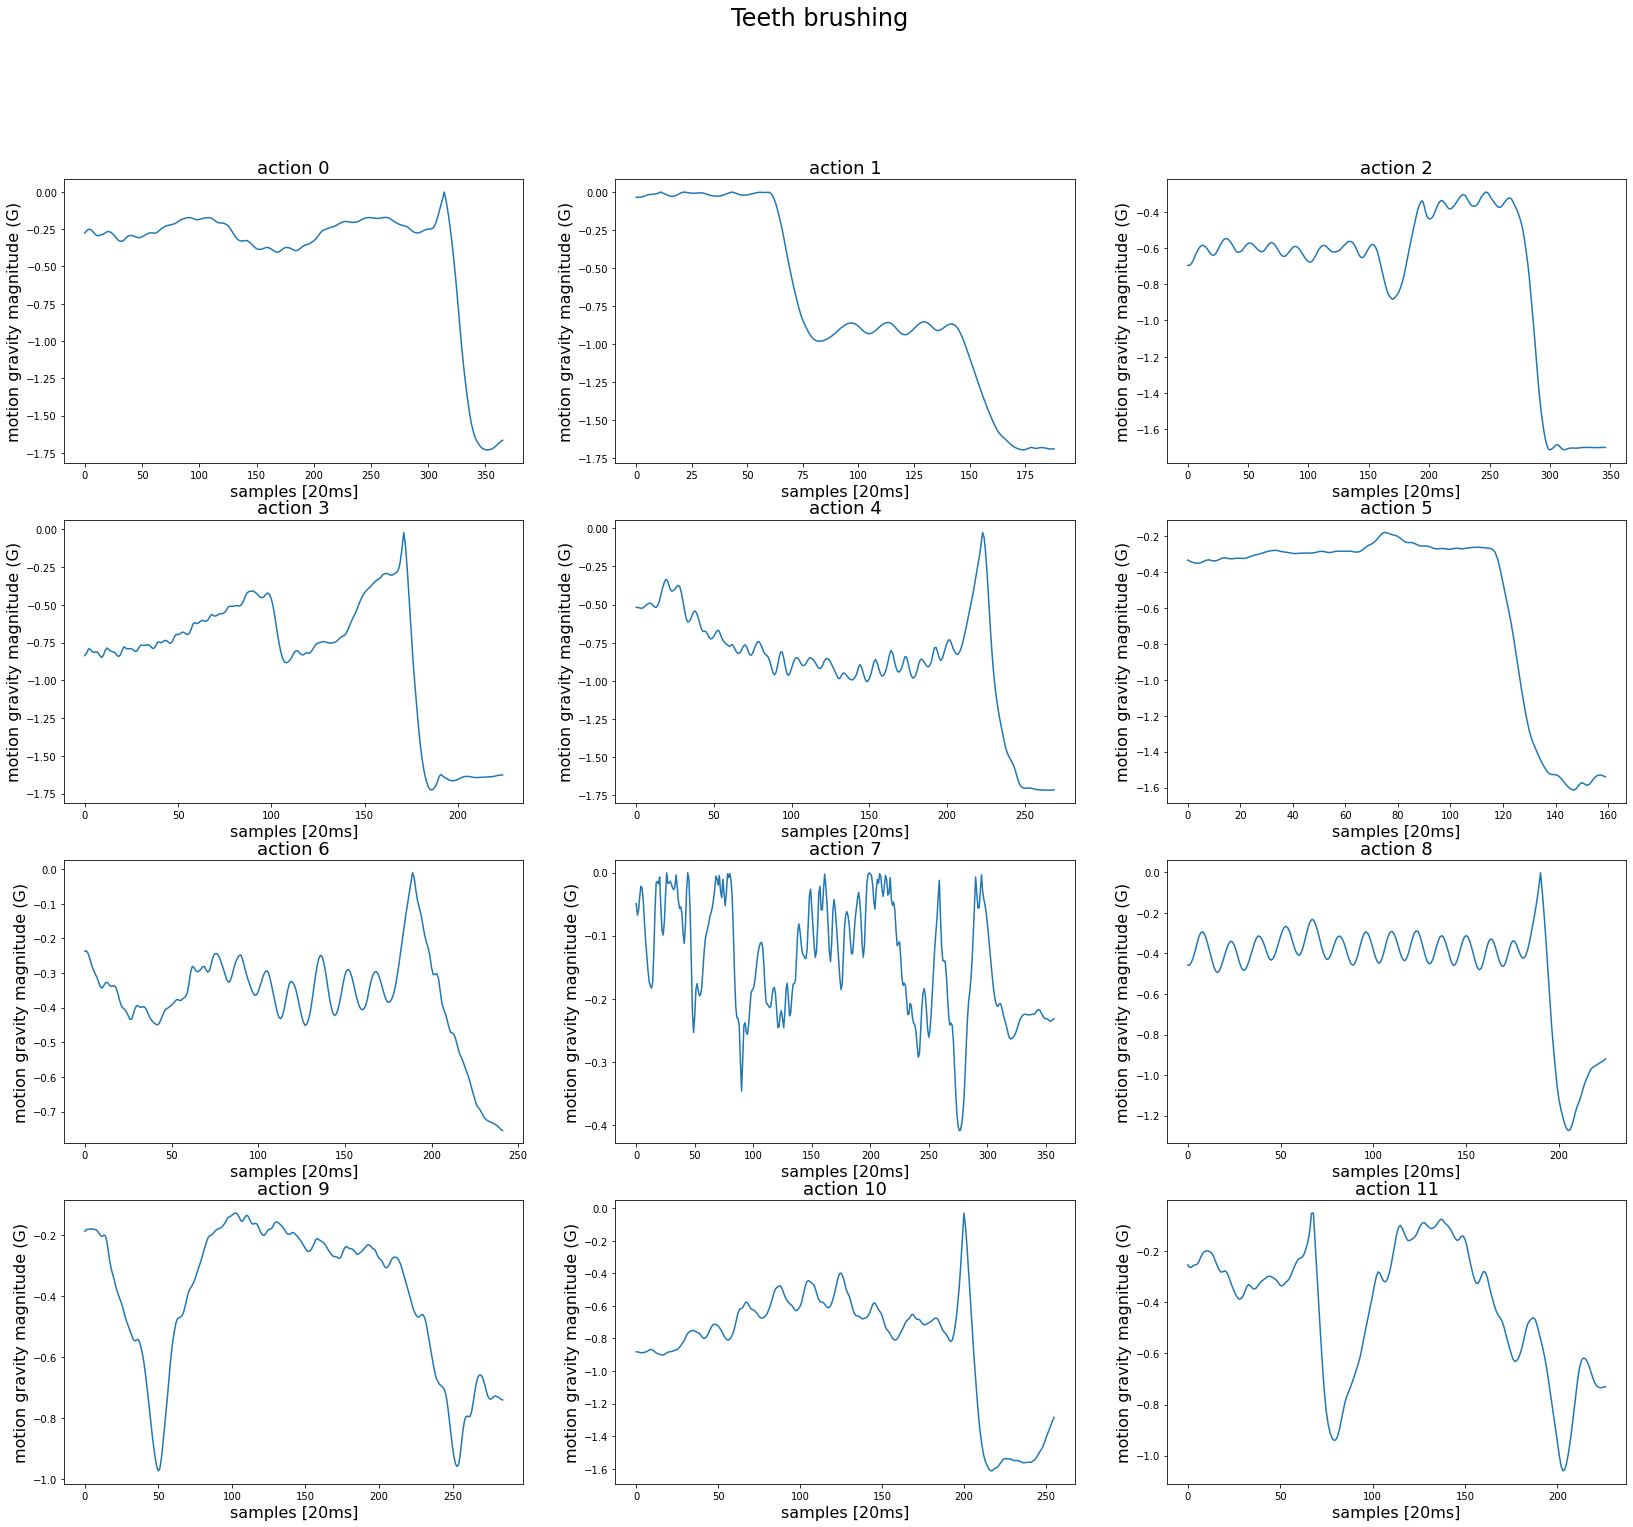

In [16]:
seq = []
labels = []
for s in test_sequences:
  seq.append(s[0])
  labels.append(s[1])

label = 'Teeth brushing'
actions_shifted = np.array(seq)[np.array(labels)==label]
actions = [seq[i] for i in np.where(np.array(labels)==label)[0]][:12] # Take 12 first only
n_actions = len(actions)
ncols, nrows = 3, math.ceil(n_actions/3)
fig, axes = plt.subplots(ncols=ncols, nrows=nrows,figsize=(28,6*nrows))
fig.suptitle(label, fontsize=24)

for i in range(n_actions):
  action = actions[i]
  action_shifted = actions_shifted[i]
  # Append plot to axis
  signal = -1*np.sqrt(action['motionGravityY(G)'].values**2 +action['motionGravityY(G)'].values**2 + action['motionGravityY(G)'].values**2)
  axes[i//3,i%3].plot( signal, label='action')
  #axes[i//3,i%3].plot(action_shifted['epoc (ms)'], action_shifted['z-axis (g)'], alpha=0.5, label='action shifted')
  axes[i//3,i%3].set_title('action {}'.format(i), fontsize=18)
  axes[i//3,i%3].set_xlabel('samples [20ms]', fontsize=16)
  axes[i//3,i%3].set_ylabel('motion gravity magnitude (G)', fontsize=16)
  #axes[i//3,i%3].legend(fontsize=14)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


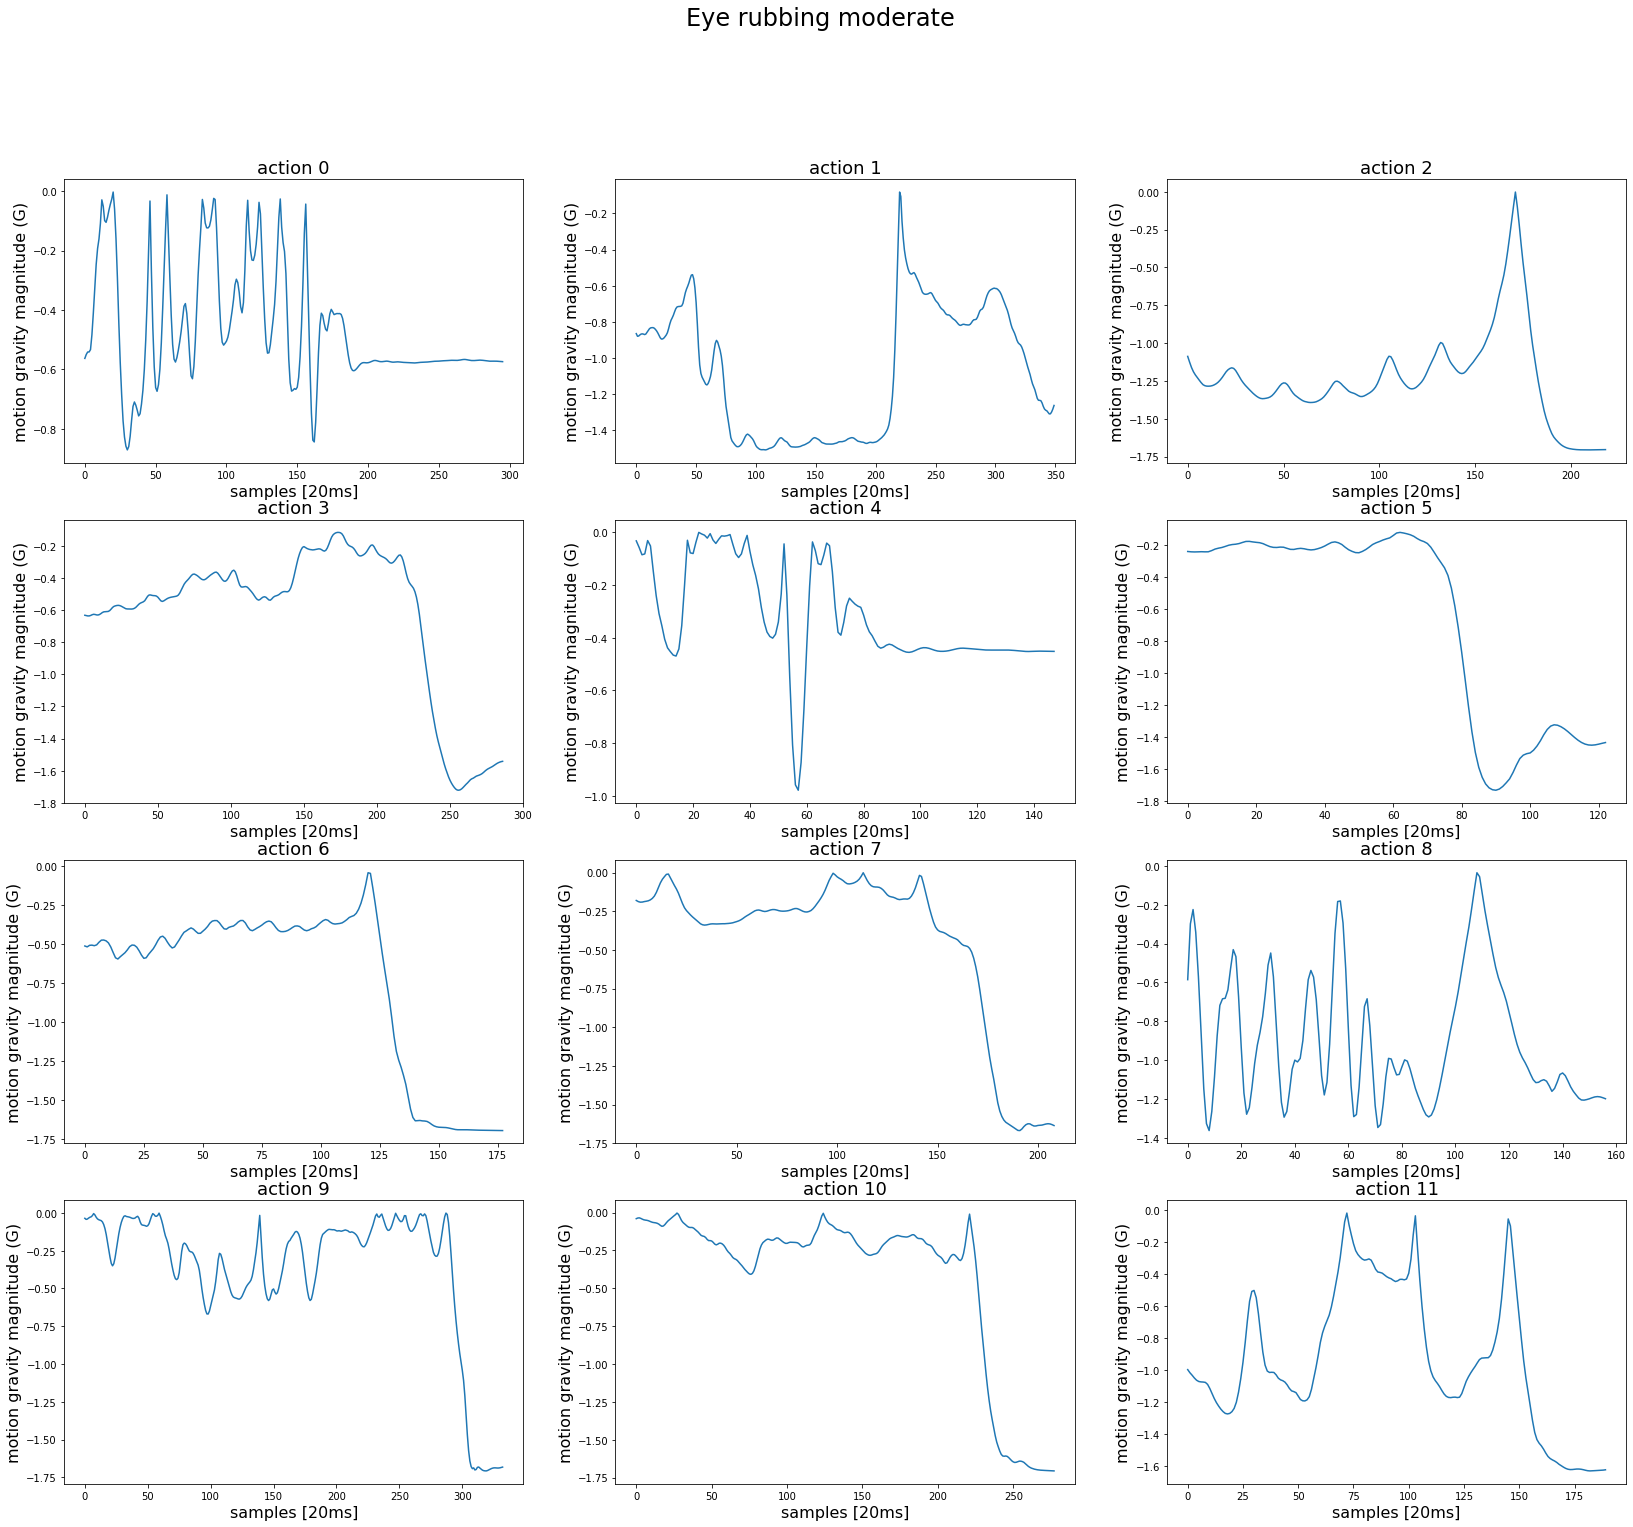

In [14]:
seq = []
labels = []
for s in test_sequences:
  seq.append(s[0])
  labels.append(s[1])

label = 'Eye rubbing moderate'
actions_shifted = np.array(seq)[np.array(labels)==label]
actions = [seq[i] for i in np.where(np.array(labels)==label)[0]][:12] # Take 12 first only
n_actions = len(actions)
ncols, nrows = 3, math.ceil(n_actions/3)
fig, axes = plt.subplots(ncols=ncols, nrows=nrows,figsize=(28,6*nrows))
fig.suptitle(label, fontsize=24)

for i in range(n_actions):
  action = actions[i]
  action_shifted = actions_shifted[i]
  # Append plot to axis
  signal = -1*np.sqrt(action['motionGravityY(G)'].values**2 +action['motionGravityY(G)'].values**2 + action['motionGravityY(G)'].values**2)
  axes[i//3,i%3].plot( signal, label='action')
  #axes[i//3,i%3].plot(action_shifted['epoc (ms)'], action_shifted['z-axis (g)'], alpha=0.5, label='action shifted')
  axes[i//3,i%3].set_title('action {}'.format(i), fontsize=18)
  axes[i//3,i%3].set_xlabel('samples [20ms]', fontsize=16)
  axes[i//3,i%3].set_ylabel('motion gravity magnitude (G)', fontsize=16)
  #axes[i//3,i%3].legend(fontsize=14)